In [1]:
'''
Regression 
문제1)
https://github.com/data-8/materials-fa17/blob/master/lec/galton.csv
data를 이용해 아버지 키로 아들의 키를 예측하는 회귀분석 모델을 작성하시오.
 - train / test 분리
 - Sequential api와 function api 를 사용해 모델을 만들어 보시오.
 - train과 test의 mse를 시각화 하시오
 - 새로운 아버지 키에 대한 자료로 아들의 키를 예측하시오.
'''

'\nRegression \n문제1)\nhttps://github.com/data-8/materials-fa17/blob/master/lec/galton.csv\ndata를 이용해 아버지 키로 아들의 키를 예측하는 회귀분석 모델을 작성하시오.\n - train / test 분리\n - Sequential api와 function api 를 사용해 모델을 만들어 보시오.\n - train과 test의 mse를 시각화 하시오\n - 새로운 아버지 키에 대한 자료로 아들의 키를 예측하시오.\n'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-fa17/refs/heads/master/lec/galton.csv')
# print(data.head())
# data.info()
# print(data.columns)
# print(data.gender.unique())

if 'gender' in data.columns:
    data = data[data['gender'].isin(['male'])]

# print(data.gender.unique())

feature = data[['father']].values
label = data[['childHeight']].values

# print(feature, label)
# print(feature.ndim)

# train/test split
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=42)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Sequential api
model = Sequential() # 계층 구조
model.add(Input((1,)))  # 입력 차원: 1
model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

opti = optimizers.SGD(learning_rate=0.00001)
model.compile(optimizer=opti, loss='mse', metrics=['mse'])  # 손실:MSE, 지표:MSE

history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=0)  # 학습 수행
# loss_metrics = model.evaluate(x=x_train, y=y_train, verbose=0)  # 학습 데이터 평가
# print('loss_metrics : ', loss_metrics)  # [loss, mse]


y_pred = model.predict(x_test)  # 예측값 계산
print('예측값 : ', y_pred.ravel()[:5])
print('실제값 : ', y_test[:5].ravel())
print('mse : ', mean_squared_error(y_test, y_pred)) # mse
print('셜명력 : ', r2_score(y_test, y_pred))  # 설명력(R^2)

# 새 데이터(n ,1)로 예측
new_data = np.array([60., 70., 80.], dtype=np.float32).reshape(-1,1)  # 새로운 입력
new_pred = model.predict(new_data).ravel()  # 새 입력 예측
print('아들 예상 키 : ', new_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
예측값 :  [71.07677 66.07361 67.07424 69.0755  67.07424]
실제값 :  [72.  65.  70.  67.5 67. ]
mse :  8.669468863265495
셜명력 :  -0.16662719476039967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
아들 예상 키 :  [60.06983  70.076126 80.08243 ]


In [86]:
data = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-fa17/refs/heads/master/lec/galton.csv')

if 'gender' in data.columns:
    data = data[data['gender'].isin(['male'])]

feature = data[['father']].values
label = data[['childHeight']].values

# train/test split
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=42)

# function api
inputs = Input(shape=(1,))
output1 = Dense(16, activation='relu')(inputs)  # 은닉층
# output2 = Dense(8, activation='relu')(output1)  # 은닉층
output3 = Dense(1, activation='linear')(output1)  # 출력층(회귀)
model2 = Model(inputs, output3)  # 입출력으로 모델 생성

opti2 = optimizers.SGD(learning_rate=0.00001)
model2.compile(optimizer=opti2, loss='mse', metrics=['mse'])  # 손실:MSE, 지표:MSE

history = model2.fit(x_train, y_train, batch_size=16, epochs=100, verbose=0, validation_data=(x_test, y_test))  # 학습 수행
# loss_metrics = model.evaluate(x=x_train, y=y_train, verbose=0)  # 학습 데이터 평가
# print('loss_metrics : ', loss_metrics)  # [loss, mse]


y_pred = model2.predict(x_test)  # 예측값 계산

print('예측값 : ', y_pred.ravel()[:5])
print('실제값 : ', y_test[:5].ravel())
print('셜명력 : ', r2_score(y_test, y_pred))  # 설명력(R^2)

# 새 데이터(n ,1)로 예측
new_data = np.array([60., 70., 80.], dtype=np.float32).reshape(-1,1)  # 새로운 입력
new_pred = model2.predict(new_data).ravel()  # 새 입력 예측
print('아들 예상 키 : ', new_pred)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
예측값 :  [70.88303 65.89182 66.89007 68.88654 66.89007]
실제값 :  [72.  65.  70.  67.5 67. ]
셜명력 :  -0.1696947766378858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
아들 예상 키 :  [59.90239 69.88479 79.86719]


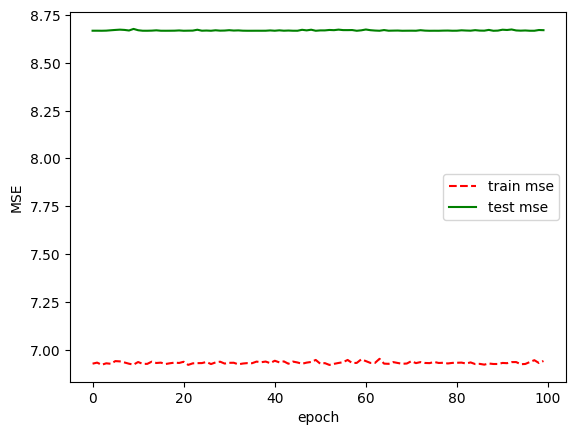

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['mse'], 'r--', label='train mse')
plt.plot(history.history['val_mse'], 'g-', label='test mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()
plt.close()